In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import mean_squared_error
import random
import pickle
import joblib

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

from scipy.stats.distributions import uniform, skewnorm
import keras

from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
#import hyperopt
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, PReLU, Dropout, Input
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import ParameterSampler
shuffle_on= True
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
##################### Calling the dataframe and preparing the data ##########################


##### Define for user #####
root_df = 'D:/PYTHON/Data_ML/'
root_models = 'D:/PYTHON/Data_ML/'

keras.__version__

'3.3.3'

In [21]:
df1=pd.read_pickle(root_df+"test.pickle") #Uniform distributed inputs

X = df1[["PSL_IP_1", "PSL_IP_2", "PSL_IP_3", "PSL_IP_4", "PSL_IP_5",
         "PSL_IP_6", "PSL_IP_7", "PSL_IP_8", "PSL_IP_9", "PSL_IP_10",
         "PSL_IP_11", "PSL_IP_12", "PSL_IP_13", "PSL_IP_14", "PSL_IP_15"]]

y = df1.drop(columns=["PSL_IP_1", "PSL_IP_2", "PSL_IP_3", "PSL_IP_4", "PSL_IP_5",
                      "PSL_IP_6", "PSL_IP_7", "PSL_IP_8", "PSL_IP_9", "PSL_IP_10",
                      "PSL_IP_11", "PSL_IP_12", "PSL_IP_13", "PSL_IP_14", "PSL_IP_15"])


# Normalisation des données
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
#X_scaled = X
#y_scaled = y

# Sauvegarder le scaler
with open(root_models + 'nn/' + 'scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open(root_models + 'nn/' + 'scaler_Y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)    

# Division des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle= True, random_state=42)

# Define the number of folds for cross-validation
k_folds = 5

#Putting the train data to the proper format
X_train=np.asarray(x_train).astype('float32')

y_train=np.asarray(y_train).astype('float32')
print(len(X_train))

847


In [22]:
# Create the activation layers
act1 = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
act2 = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
act3 = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
act4 = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)

# Create the model
model = Sequential()

# Add the input layer
model.add(Input(shape=(X_train.shape[1],)))  # 100 paramètres d'entrée

# Add the hidden layers
model.add(Dense(128, activation=None))  # Ajustez le nombre d'unités si nécessaire
model.add(act1)
model.add(Dropout(0.2))

model.add(Dense(256, activation=None))  # Ajustez le nombre d'unités si nécessaire
model.add(act2)
model.add(Dropout(0.2))

model.add(Dense(512, activation=None))  # Ajustez le nombre d'unités si nécessaire
model.add(act3)
model.add(Dropout(0.2))

#model.add(Dense(1024, activation=None))  # Ajustez le nombre d'unités si nécessaire
#model.add(act4)
#model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(y_train.shape[1], activation='linear'))  # 15 paramètres de sortie pour la régression

print(X_train.shape[1])
print(y_train.shape[1])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


15
500


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_8 (PReLU)               │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_9 (PReLU)               │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_10 (PReLU)              │ (None, 512)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 500)            │       256,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,052 (1.62 MB)

 Trainable params: 424,052 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.activations import gelu

# Création du modèle
model = Sequential()

# Ajout de la couche d'entrée
model.add(Input(shape=(X_train.shape[1],)))  # Nombre de features en entrée

# Ajout des couches cachées avec GELU
model.add(Dense(128, activation=gelu))
model.add(Dropout(0.2))

model.add(Dense(256, activation=gelu))
model.add(Dropout(0.2))

model.add(Dense(512, activation=gelu))
model.add(Dropout(0.2))

# Ajout de la couche de sortie
model.add(Dense(y_train.shape[1], activation='linear'))  # Sortie linéaire pour la régression

print(X_train.shape[1])
print(y_train.shape[1])

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Affichage du résumé du modèle
model.summary()


15
500


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       256,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,156 (1.61 MB)

 Trainable params: 423,156 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Load the data
# Assuming X_train and y_train are your training data
# Define the K-fold cross-validator

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# Initialize the list to store the evaluation results for each fold
scores = []
# Callback pour sauvegarder le meilleur modèle (sans HDF5)
checkpoint = ModelCheckpoint(root_models + 'nn/' + 'direct_test.keras', 
                             monitor='val_loss', 
                             save_best_only=True)  # <- Ajout du format "keras"

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(X_train):

  # Get the training and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model to the training data for this fold
    model.fit(X_train_fold, y_train_fold, epochs=250, batch_size=32,verbose=0, validation_split=0.1, callbacks=[checkpoint], validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation data for this fold
    score = model.evaluate(X_val_fold, y_val_fold, verbose=1)

    # Add the score for this fold to the list of scores
    scores.append(score)
    print(f"Score = {score}")

train_loss = model.evaluate(X_train_fold, y_train_fold, verbose=0)
val_loss = model.evaluate(X_val_fold, y_val_fold, verbose=0)

print(f"Train Loss: {train_loss:.6f}")
print(f"Validation Loss: {val_loss:.6f}")


# Print the mean and standard deviation of the scores across all folds
print("Mean score: %.6f (%.6f)" % (np.mean(scores), np.std(scores)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8774e-04 
Score = 0.00030908003100194037
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 3.8530e-04
Score = 0.0003393882652744651
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0013
Score = 0.001354584121145308
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0658e-04 
Score = 0.0002385351835982874
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 4.7405e-04
Score = 0.0005471751792356372
Train Loss: 0.000262
Validation Loss: 0.000547
Mean score: 0.000558 (0.000411)


In [34]:
nn_model = load_model(root_models+'nn/'+'direct_test.keras')
#type(nn_model)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test R²: 0.9795234997690848
Train R²: 0.9895793199539185


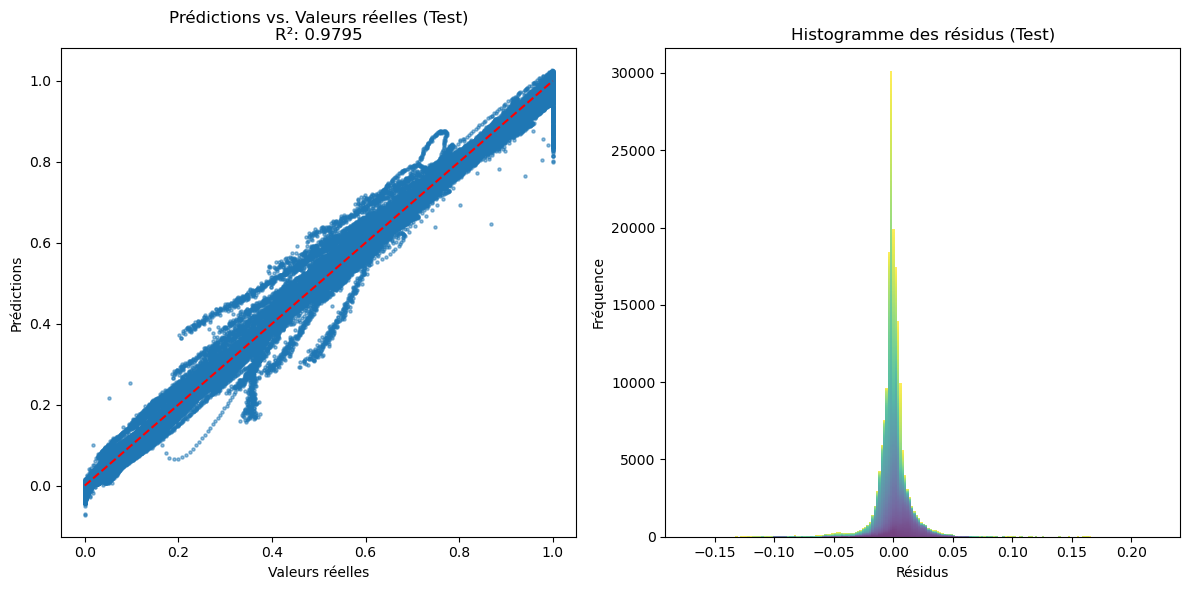

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur les données de test et d'entraînement
y_pred1_test = nn_model.predict(x_test)
y_pred_train = nn_model.predict(x_train)

# Calcul du R² pour les données de test
r2_test = r2_score(y_test, y_pred1_test)
print('Test R²:', r2_test)

# Calcul du R² pour les données d'entraînement
r2_train = r2_score(y_train, y_pred_train)
print('Train R²:', r2_train)

# Visualisation des prédictions vs. valeurs réelles pour les données de test
plt.figure(figsize=(12, 6))

# Nuage de points des prédictions vs. valeurs réelles
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred1_test, alpha=0.5, s=5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title(f'Prédictions vs. Valeurs réelles (Test)\nR²: {r2_test:.4f}')

# Histogramme des résidus
plt.subplot(1, 2, 2)
residuals = y_test - y_pred1_test
colors = plt.cm.viridis(np.linspace(0, 1, residuals.shape[1]))  # Crée une liste de couleurs
plt.hist(residuals, bins=200, alpha=0.75, color=colors, stacked=True)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus (Test)')

plt.tight_layout()
plt.show()
